# 데이터 클린징

### 생존자 편향 (survivor bias), 표본 편향 (sample bias) 의 오류

### 데이터 클린징

## 결측 데이터

### 결측 데이터의 처리

### 결측 데이터

### 결측치의 확인

In [2]:
import pandas as pd
pd.isnull()

TypeError: isna() missing 1 required positional argument: 'obj'

In [3]:
import pandas as pd
pd.notnull()

TypeError: notna() missing 1 required positional argument: 'obj'

### 결측치의 갯수

In [10]:
import pandas as pd
df = pd.DataFrame()

df.isnull().sum()   # 컬럼별 결측값 개수 구하기
df.isnull().sum(1)  # 행 단위로 결측값 개수 구하기
df.notnull().sum(1) # 행 단위로 실제값 개수 구하기

Series([], dtype: float64)

### 결측치의 탐지

In [17]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col=0, encoding="cp949")
missing_data = weather [ weather['평균 풍속(m/s)'].isna() ]
print(missing_data)

            평균기온(°C)  최대 풍속(m/s)  평균 풍속(m/s)
일시                                          
2012-02-11      -0.7         NaN         NaN
2012-02-12       0.4         NaN         NaN
2012-02-13       4.0         NaN         NaN
2015-03-22      10.1        11.6         NaN
2015-04-01       7.3        12.1         NaN
2019-04-18      15.7        11.7         NaN


### 결측치의 제거

In [19]:
# pd.DataFrame.dropna(axis=0, how='any', inplace=False)
weather.dropna(axis=0, how='any', inplace=True)
weather.loc['2012-02-11']   # 결측 데이터가 있던 행이 삭제되었음을 확인

### 결측치의 대체

In [25]:
import pandas as pd
df = pd.DataFrame()

df.fillna(0)            # 결측값을 특정 값으로 채우기
df.fillna(' ')          # 결측값을 특정 문자열로 채우기
df.fillna(df.mean())    # 결측값을 변수별 평균으로 대체

""


In [22]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col=0, encoding="cp949")
weather.fillna(0, inplace=True)     # 결손값을 0으로 채움, inplace를 True로 설정해 원본 데이터를 수정

print(weather.loc['2012-02-11'])   # 결측 데이터가 0으로 대체되었음을 확인

평균기온(°C)     -0.7
최대 풍속(m/s)    0.0
평균 풍속(m/s)    0.0
Name: 2012-02-11, dtype: float64


In [24]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col=0, encoding="cp949")
weather.fillna( weather['평균 풍속(m/s)'].mean(), inplace=True )   # 결손값을 평균값으로 채움
print(weather.loc['2012-02-11'])   # 결측 데이터가 평균값으로 대체되었음을 확인

평균기온(°C)     -0.700000
최대 풍속(m/s)    3.936441
평균 풍속(m/s)    3.936441
Name: 2012-02-11, dtype: float64


### 결측 데이터의 유의사향

## 이상 데이터

### 이상 데이터

### 이상 데이터 활용 분야

### 이상 데이터의 처리

### 이상 데이터의 시각화

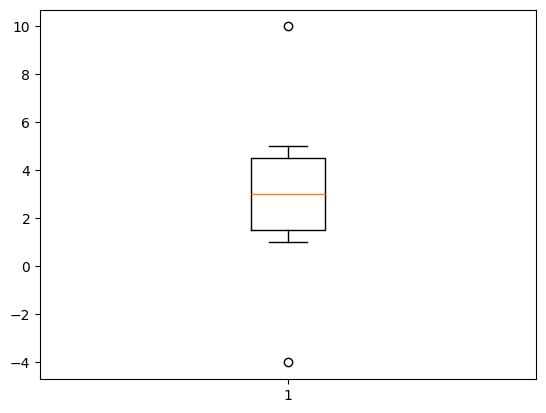

In [39]:
import matplotlib.pyplot as plt

data = [-4, 1, 2, 3, 4, 5, 10]

plt.boxplot(data)
plt.show()

### 이상 데이터 탐색(예)

In [41]:
import pandas as pd
file_path = "./bicycle_out.csv"
df = pd.read_csv(file_path, encoding="cp949")

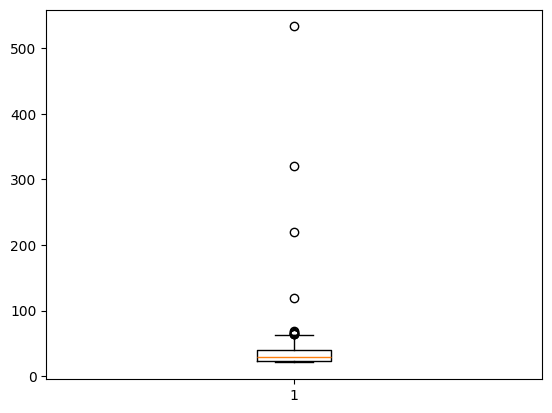

In [42]:
import matplotlib.pylab as plt
plt.boxplot(df['나이'])
plt.show()

In [50]:
df_corr = df[df['나이'] > 70]
df_corr

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.0,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.0,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,NaN,2300.0,220


### 이상 데이터 삭제(예)

In [52]:
df1 = df.drop([4, 30, 47, 86])

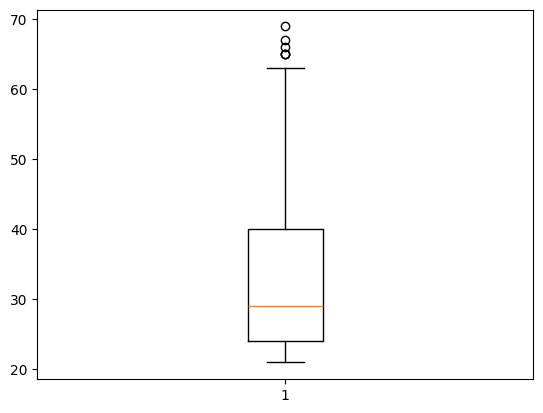

In [53]:
plt.boxplot(df1['나이'])
plt.show()

In [54]:
df[df['나이'] > 62].index

Index([4, 30, 47, 86, 123, 148, 221, 263, 294, 361, 362, 363], dtype='int64')

In [55]:
df2 = df.drop(df[df['나이'] > 62].index)

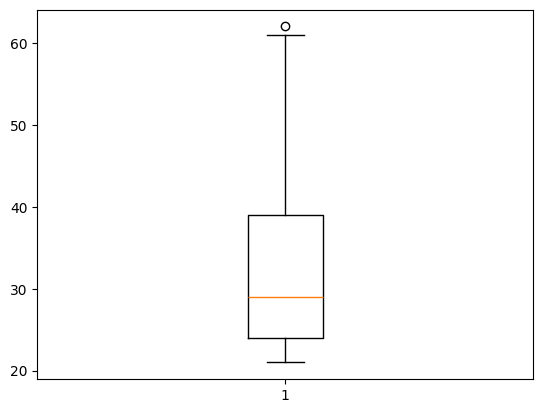

In [56]:
plt.boxplot(df2['나이'])
plt.show()

### 이상 데이터의 처리 방법

## 중복 데이터

### 중복 데이터

### 중복 데이터의 처리 방법

### 중복 데이터의 처리

### 중복 데이터 확인(예)

In [57]:
import pandas as pd
file_path = "./bicycle_dup.csv"
df = pd.read_csv(file_path, encoding="cp949")

In [58]:
df[df.duplicated(['이용거리'])].index

Index([  1,   6,   7,  11,  12,  16,  17,  20,  22,  23,
       ...
       402, 403, 405, 408, 409, 411, 412, 416, 417, 418],
      dtype='int64', length=163)

### 중복 데이터 제거(예)

In [59]:
df.drop_duplicates(['이용거리'], keep='first')

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
410,SPB-18614,2019-11-14 23:07,391,정동길입구,5.0,2019-11-14 23:49,101,(구)합정동 주민센터,3.0,40.0,7510.0,28
413,SPB-25161,2019-11-15 3:13,106,합정역 7번출구 앞,6.0,2019-11-15 3:18,101,(구)합정동 주민센터,1.0,3.0,640.0,21
414,SPB-24515,2019-11-15 3:58,112,극동방송국 앞,1.0,2019-11-15 4:08,101,(구)합정동 주민센터,1.0,9.0,1620.0,21
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22


## (참고) Data 업로드 위치와 encoding 주의

In [60]:
import pandas as pd
# 파일경로를 찾고 변수 file_path에 저장
file_path = "./bicycle.csv"

# read_csv() 함수로 데이터프레임 변환.
df = pd.read_csv(file_path, encoding="cp949")
df

FileNotFoundError: [Errno 2] No such file or directory: './bicycle.csv'